# Exploring the mentions of Mette Frederiksen on Twitter

In [166]:
import pandas as pd
from icecream import ic
import glob
import datetime as dt

from ast import literal_eval


import seaborn as sns; sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pyplot_themes as themes

In [167]:
def set_base_plot_settings(fontsize, if_palette):
    matplotlib.rc('ytick', labelsize=fontsize)
    matplotlib.rc('xtick', labelsize=fontsize)
    themes.theme_minimal(grid=False, ticks=False, fontsize=fontsize)
    a4_dims = (25,15)
    
    if if_palette:
        #          0 black      1 orange  2 L blue   3 green    4 L orange  5 D blue  6 D orange 7 purple
        palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]
    else:
        palette = 0
    
    fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
    sns.set(font_scale = 2)

    return fig, ax1, palette

def set_late_plot_settings(if_dates):
    ax1.set(xlabel="", ylabel = "")
    ax1.xaxis.get_label().set_fontsize(40)
    ax1.yaxis.get_label().set_fontsize(40)

    ax1.grid(color='darkgrey', linestyle='-', linewidth=0.5, which= "both")
    if if_dates:
        # Define the date format
        ax1.xaxis_date()
        date_form = mdates.DateFormatter("%d-%b")
        ax1.xaxis.set_major_formatter(date_form)

    ax1.set(ylim=(0, None))
    
    #ax1.set_yticklabels(ax1.get_yticks(), size = 35)

    #fig.suptitle("Mentions of 'vaccin*'. 2020 - 2021", size = "40")
    return fig, ax1

def set_late_barplot_settings():
    ax1.set(xlabel="", ylabel = "")
    ax1.xaxis.get_label().set_fontsize(40)
    ax1.yaxis.get_label().set_fontsize(40)
        
    #ax1.set_yticklabels(ax1.get_yticks(), size = 35)

    #fig.suptitle("Mentions of 'vaccin*'. 2020 - 2021", size = "40")
    return fig, ax1

In [168]:
df = pd.read_csv(glob.glob("../hope-keyword-templates/mettefrederiksen_smoothed*.csv")[0], 
                 converters={"tokens_list": literal_eval, "hashtags": literal_eval})
df["date"] = pd.to_datetime(df["date"])
print(len(df))
df.head()

26461


,index,created_at,id,text,search_keyword,date,mentioneless_text,text50,dupe50,neg,...,tokens_string,centered_compound,day,entropy,normalized_entropy,centered_entropy,s200_compound,s200_nr_of_tweets,s500_compound,s500_nr_of_tweets
0,0,2020-02-01 09:16:56+00:00,1.223536e+18,@Mettetweeter Arh - jeg synes egentlig ikke de...,['mette frederiksen'],2020-02-01,Arh - jeg synes egentlig ikke det er sjovt. H...,Arh - jeg synes egentlig ikke det er sjovt. H...,False,0.115,...,arh egentlig sjov grin mette frederiksen måde,-0.408426,2020-02-01,2.138397,0.382598,-0.351568,-0.017740,13.644867,-0.029372,20.927749
1,1,2020-02-01 09:21:23+00:00,1.223537e+18,Der er 51% Der gerne vil ifg. Mette Fredriksen...,['mette fredriksen'],2020-02-01,Der er 51% Der gerne vil ifg. Mette Fredriksen...,Der er 51% Der gerne vil ifg. Mette Fredriksen...,False,0.000,...,51 gerne ifg mette fredriksen flytte tyskland ...,-0.051426,2020-02-01,2.138397,0.382598,-0.351568,-0.017940,13.655226,-0.029362,20.955347
2,2,2020-02-01 12:27:04+00:00,1.223584e+18,"Du tager helt fejl, Morten Østergaard @oesterg...",['mette frederiksen'],2020-02-01,"Du tager helt fejl, Morten Østergaard - Mette...","Du tager helt fejl, Morten Østergaard - Mette...",False,0.167,...,tage fejl morten østergaard mette frederiksen ...,-0.145126,2020-02-01,2.138397,0.382598,-0.351568,-0.018143,13.665724,-0.029352,20.983021
3,3,2020-02-01 12:46:14+00:00,1.223588e+18,Mette Frederiksen og @JeppeKofod skal finde al...,['mette frederiksen'],2020-02-01,Mette Frederiksen og skal finde alliancepartn...,Mette Frederiksen og skal finde alliancepartn...,False,0.000,...,mette frederiksen finde alliancepartner ønske ...,-0.051426,2020-02-01,2.138397,0.382598,-0.351568,-0.018348,13.676363,-0.029341,21.010773
4,4,2020-02-01 17:12:31+00:00,1.223655e+18,#MetteF ( @Spolitik ) er KUN #statsminister FO...,['mettef'],2020-02-01,( ) er KUN FOR 2 børn - hendes egne...,( ) er KUN FOR 2 børn - hendes egne...,False,0.211,...,2 barn egn,-0.391326,2020-02-01,2.138397,0.382598,-0.351568,-0.018555,13.687145,-0.029331,21.038600


In [169]:
df.describe()

,index,id,neg,neu,pos,compound,nr_of_tweets,date_ordinal,compound_7day_ave,centered_compound,entropy,normalized_entropy,centered_entropy,s200_compound,s200_nr_of_tweets,s500_compound,s500_nr_of_tweets
count,26461.000000,2.646100e+04,26461.000000,26461.000000,26461.000000,26461.000000,26461.000000,26461.000000,26455.000000,2.646100e+04,26461.000000,26461.000000,2.646100e+04,2.646100e+04,26461.000000,26461.000000,26461.000000
mean,14555.326518,1.323189e+18,0.063548,0.846111,0.090341,0.051426,95.525301,737730.799365,0.051437,4.262827e-16,3.518470,0.734166,2.169624e-14,9.446066e-07,95.536807,0.000084,95.543228
std,8307.856436,4.760233e+16,0.085551,0.117886,0.094059,0.428002,70.522727,131.362664,0.171145,4.280023e-01,0.600233,0.152907,1.529068e-01,4.184190e-02,61.139592,0.032556,52.494305
min,0.000000,1.223536e+18,0.000000,0.000000,0.000000,-0.984400,3.000000,737456.000000,-0.705971,-1.035826e+00,0.636514,0.000000,-7.341662e-01,-1.395374e-01,13.644867,-0.100147,20.927749
25%,7421.000000,1.285805e+18,0.000000,0.771000,0.000000,-0.169600,43.000000,737628.000000,-0.060000,-2.210258e-01,3.173769,0.646355,-8.781128e-02,-2.587502e-02,52.278339,-0.019397,54.196653
50%,14638.000000,1.331306e+18,0.028000,0.857000,0.073000,0.000000,74.000000,737753.000000,0.056600,-5.142580e-02,3.577735,0.749263,1.509732e-02,2.697796e-03,76.142256,0.002080,81.716603
75%,21760.000000,1.361238e+18,0.106000,0.934000,0.143000,0.339900,138.000000,737836.000000,0.167550,2.884742e-01,3.919754,0.836392,1.022254e-01,2.594406e-02,122.855366,0.019259,121.849456
max,28851.000000,1.401260e+18,0.638000,1.000000,1.000000,0.978400,360.000000,737946.000000,0.635243,9.269742e-01,4.561996,1.000000,2.658338e-01,1.283182e-01,356.414571,0.084435,314.290890


In [170]:
sdf = pd.read_csv(glob.glob("../hope-keyword-templates/@statsmin_smoothed*.csv")[0], 
                 converters={"tokens_list": literal_eval, "hashtags": literal_eval})
sdf["date"] = pd.to_datetime(sdf["date"])
print(len(sdf))
sdf.head()

10775


,index,created_at,id,text,search_keyword,date,mentioneless_text,text50,dupe50,neg,...,tokens_string,centered_compound,day,entropy,normalized_entropy,centered_entropy,s200_compound,s200_nr_of_tweets,s500_compound,s500_nr_of_tweets
0,0,2020-02-01 07:53:32+00:00,1.223515e+18,@EDantzer @RasmusMalver @Statsmin Så er der me...,[' @statsmin'],2020-02-01,Så er der mere ærlighed andre steder. Lolla...,Så er der mere ærlighed andre steder. Lolla...,False,0.000,...,ærlighed sted lolland vedtage vaskeordning …,0.367738,2020-02-01,0.000000,0.000000,-0.661062,-0.015435,21.175673,-0.014628,34.425955
1,1,2020-02-02 10:37:35+00:00,1.223918e+18,Vi starter hvert afsnit af @Statsministre med ...,[' @statsmin'],2020-02-02,Vi starter hvert afsnit af med et kendt citat...,Vi starter hvert afsnit af med et kendt citat...,False,0.000,...,start afsnit kende citat afsnit scavenius funde …,-0.060162,2020-02-02,0.693147,0.160277,-0.500785,-0.015429,21.197607,-0.014620,34.498473
2,2,2020-02-02 16:13:03+00:00,1.224003e+18,De danske myndigheder tager sgu da alt for let...,[' @statsmin'],2020-02-02,De danske myndigheder tager sgu da alt for let...,De danske myndigheder tager sgu da alt for let...,False,0.389,...,dansk myndighed tage sgu le epidemi …,-0.825162,2020-02-02,0.693147,0.160277,-0.500785,-0.015422,21.219357,-0.014611,34.571309
3,3,2020-02-03 18:21:55+00:00,1.224398e+18,@regeringDK @AB_EuroSim @statsministeren @skaa...,[' @statsmin'],2020-02-03,Og Nazisten Hitler er = Børnehave \nNår N…,Og Nazisten Hitler er = Børnehave \nNår N…,False,0.000,...,nazist hitler børnehave n …,-0.060162,2020-02-03,0.000000,0.000000,-0.661062,-0.015416,21.240923,-0.014602,34.644465
4,4,2020-02-03 18:45:26+00:00,1.224404e+18,@PaigeZanco @loneludvig @speedfire55 @FrkT1972...,[' @statsmin'],2020-02-03,…,…,False,0.000,...,…,-0.060162,2020-02-03,0.000000,0.000000,-0.661062,-0.015410,21.262304,-0.014593,34.717941


## Explore keywords matches

In [171]:
df.groupby(["search_keyword"]).count().reset_index()

,search_keyword,index,created_at,id,text,date,mentioneless_text,text50,dupe50,neg,...,tokens_string,centered_compound,day,entropy,normalized_entropy,centered_entropy,s200_compound,s200_nr_of_tweets,s500_compound,s500_nr_of_tweets
0,"['mette frederiksen', 'mette fredriksen']",7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
1,['mette frederiksen'],23141,23141,23141,23141,23141,23141,23141,23141,23141,...,23141,23141,23141,23141,23141,23141,23141,23141,23141,23141
2,['mette fredriksen'],625,625,625,625,625,625,625,625,625,...,625,625,625,625,625,625,625,625,625,625
3,"['mettef', 'mette frederiksen']",17,17,17,17,17,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
4,['mettef'],1549,1549,1549,1549,1549,1549,1549,1549,1549,...,1545,1549,1549,1549,1549,1549,1549,1549,1549,1549
5,"['mettefrederiksen', 'mettef', 'mette frederik...",42,42,42,42,42,42,42,42,42,...,42,42,42,42,42,42,42,42,42,42
6,"['mettefrederiksen', 'mettef', 'mette fredriks...",1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7,"['mettefrederiksen', 'mettef']",1057,1057,1057,1057,1057,1057,1057,1057,1057,...,1049,1057,1057,1057,1057,1057,1057,1057,1057,1057
8,"['mettefrederiksen', 'mettefredriksen', 'mettef']",1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
9,"['mettefredriksen', 'mettef', 'mette frederiks...",1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


# Visualize how many tweets per day

In [172]:
df.nr_of_tweets.describe()

count    26461.000000
mean        95.525301
std         70.522727
min          3.000000
25%         43.000000
50%         74.000000
75%        138.000000
max        360.000000
Name: nr_of_tweets, dtype: float64

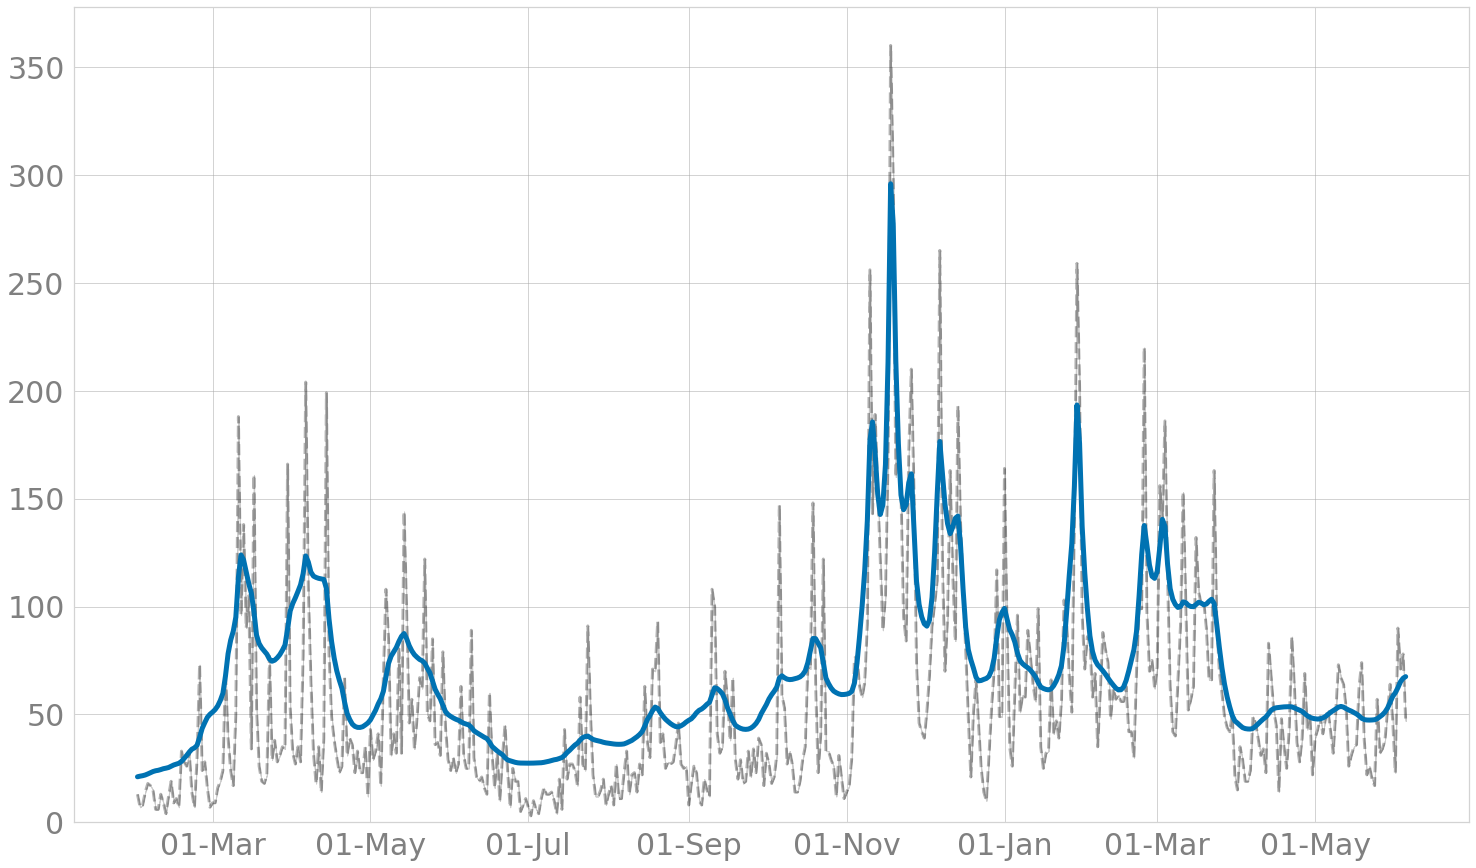

In [173]:
fig, ax1, palette = set_base_plot_settings(fontsize=30, if_palette = True)

ax1 = sns.lineplot(x="date", y="nr_of_tweets", 
                  color = palette[0], 
                   alpha = 0.3, linestyle = "dashed",
                     linewidth = 3, data = df)

ax1 = sns.lineplot(x="date", y="s500_nr_of_tweets", 
                  color = palette[5], 
                     linewidth = 5, data = df)

fig, ax1 = set_late_plot_settings(if_dates = True)

plot_name = "fig/twitter_tweet_frequency.png"
fig.savefig(plot_name)

fig.show()

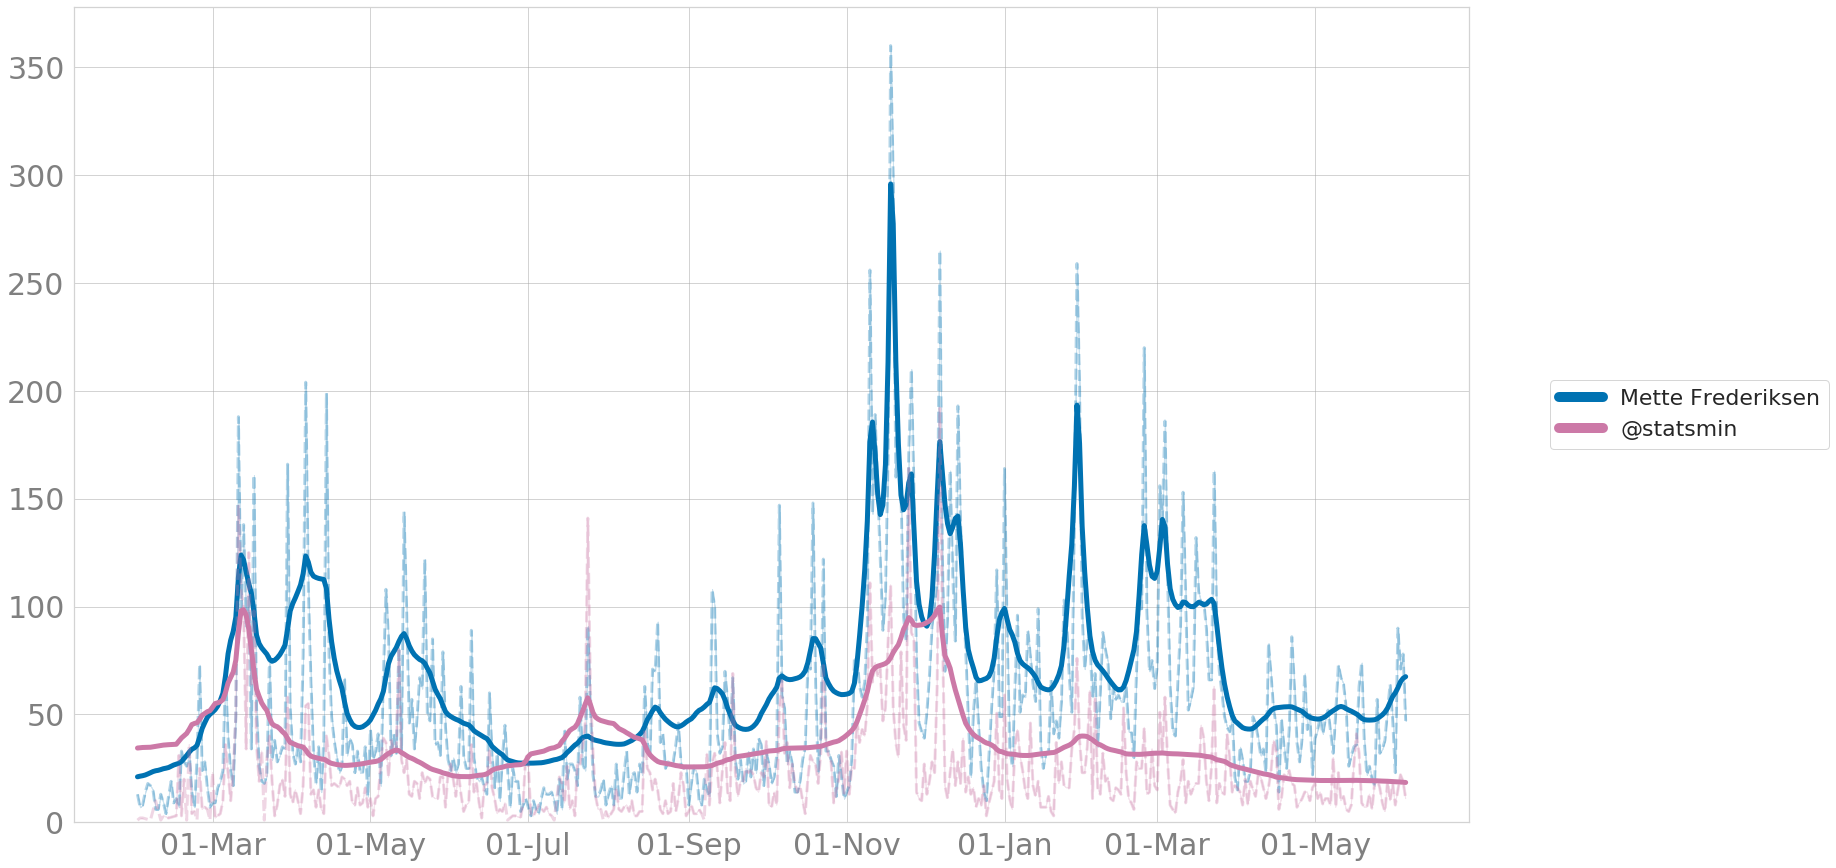

In [217]:
fig, ax1, palette = set_base_plot_settings(fontsize=30, if_palette = True)

ax1 = sns.lineplot(x="date", y="nr_of_tweets", 
                  color = palette[5], 
                   alpha = 0.3, linestyle = "dashed",
                     linewidth = 3, data = df)

ax1 = sns.lineplot(x="date", y="s500_nr_of_tweets", 
                  color = palette[5], 
                   label = "Mette Frederiksen",
                     linewidth = 5, data = df)

ax1 = sns.lineplot(x="date", y="nr_of_tweets", 
                  color = palette[7], 
                   alpha = 0.3, linestyle = "dashed",
                     linewidth = 3, data = sdf)

ax1 = sns.lineplot(x="date", y="s500_nr_of_tweets", 
                  color = palette[7], 
                   label = "@statsmin",
                     linewidth = 5, data = sdf)

fig, ax1 = set_late_plot_settings(if_dates = True)

leg = plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', facecolor='white')
# set the linewidth of each legend object
for legobj in leg.legendHandles:
    legobj.set_linewidth(10.0)

plot_name = "fig/twitter_MF_and_statsmin_tweet_frequency.png"
fig.savefig(plot_name, bbox_extra_artists=(leg,), bbox_inches='tight')

fig.show()

## They seem to correlate heavily - how heavily?

In [175]:
MF = pd.DataFrame(df["date"], df["nr_of_tweets"]).reset_index().rename(columns={"nr_of_tweets":"Mette Frederiksen"})
s = pd.DataFrame(sdf["date"], sdf["nr_of_tweets"]).reset_index().rename(columns={"nr_of_tweets":"@Statsmin"})

co_df = pd.merge(MF,s).drop_duplicates()

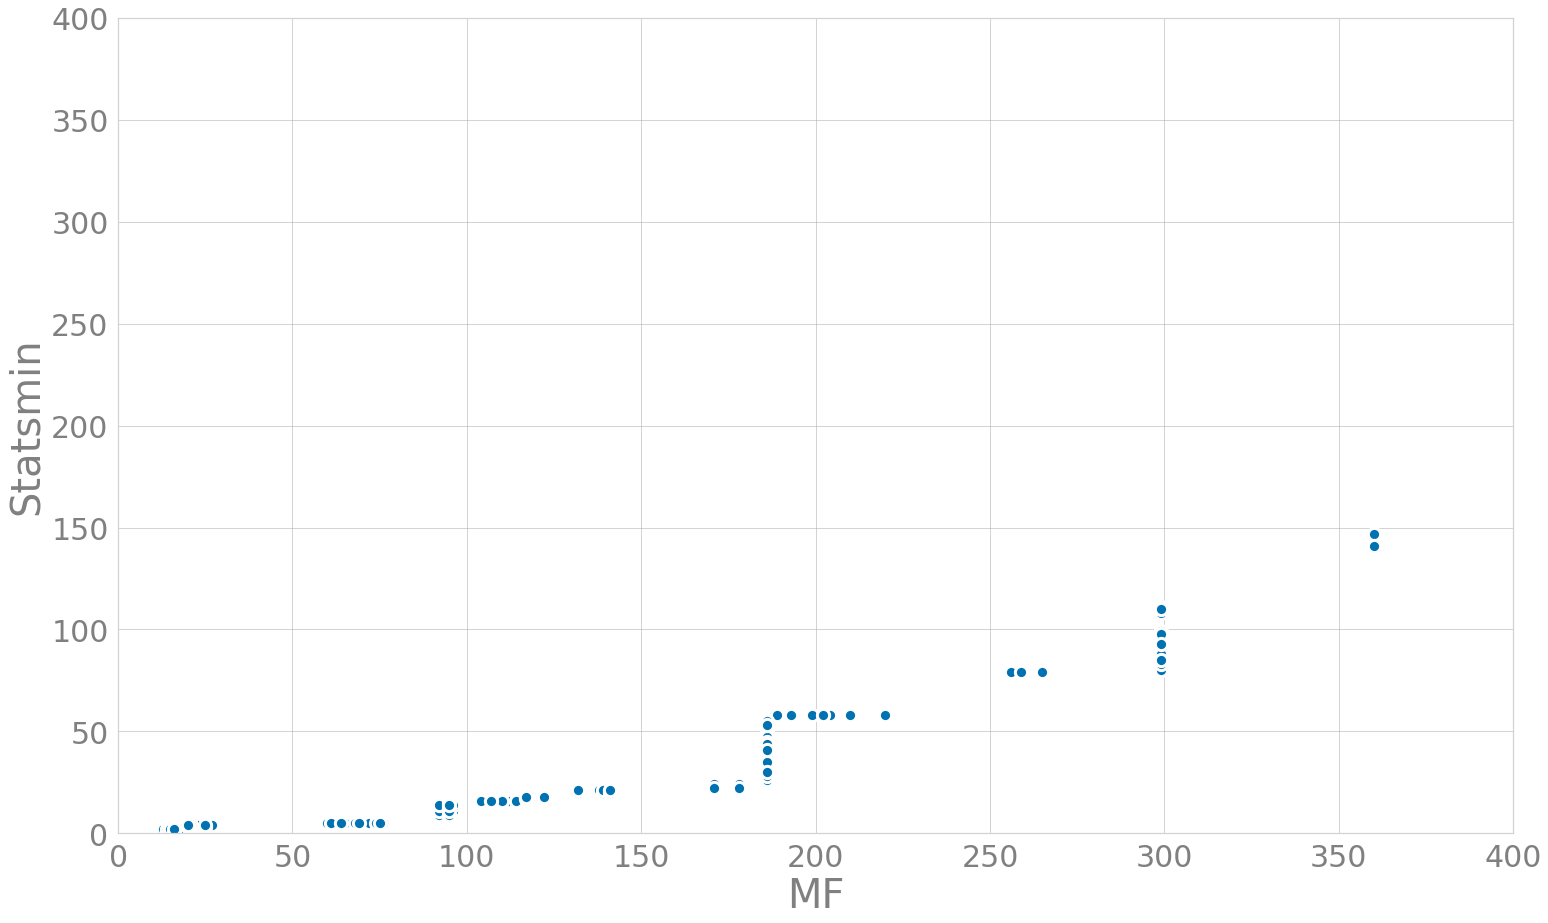

In [177]:
fig, ax1, palette = set_base_plot_settings(fontsize=30, if_palette = True)

ax1 = sns.scatterplot(x="Mette Frederiksen", y="@Statsmin", 
                  color = palette[5], s = 150, x_jitter = 0.5, y_jitter = 0.5,
                     linewidth = 3, data = co_df)


fig, ax1 = set_late_plot_settings(if_dates = False)

ax1.set(ylim=(0, 400), xlim=(0, 400))

ax1.set(xlabel="MF", ylabel = "Statsmin")

plot_name = "fig/twitter_MF_vs_statsmin_correlations.png"
fig.savefig(plot_name)

fig.show()

## Hashtags

In [178]:
import re

def extract_hashtags(row):
    unique_hashtag_list = list(re.findall(r'#\S*\w', row["text"]))
    return unique_hashtag_list

def hashtag_per_row(data):
    # Create hashtags column with the actual unique hashtags
    data["hashtags"] = data.apply(lambda row: extract_hashtags(row), axis = 1)

    # Let's take a subset of necessary columns, add id
    df = data[["date", "hashtags"]].reset_index().rename(columns={"index": "id"})

    # Select only the ones where we have more than 1 hashtag per tweet
    df = df[df["hashtags"].map(len) > 1].reset_index(drop=True)

    # Hashtag per row
    # convert list of pd.Series then stack it
    df = (df
     .set_index(['date','id'])['hashtags']
     .apply(pd.Series)
     .stack()
     .reset_index()
     .drop('level_2', axis=1)
     .rename(columns={0:'hashtag'}))
    #lowercase!
    df["hashtag"] = df["hashtag"].str.lower()
    df["hashtag"] = df["hashtag"].str.replace("'.", "")
    df["hashtag"] = df["hashtag"].str.replace("’.", "")

    return df
# Just MF
hashtags = hashtag_per_row(df)

In [179]:
# Aggregate a frequency DF
def get_hashtag_frequencies(df):
    # Add freq of hashtags by themselves in the dataset
    tweet_freq = pd.DataFrame({'nr_of_hashtags' : df.groupby(['hashtag']).size()}).reset_index()
    return tweet_freq

In [180]:
freq_hashtags = get_hashtag_frequencies(hashtags)
dff = freq_hashtags.sort_values(by=['nr_of_hashtags'], ascending=False)[0:30]

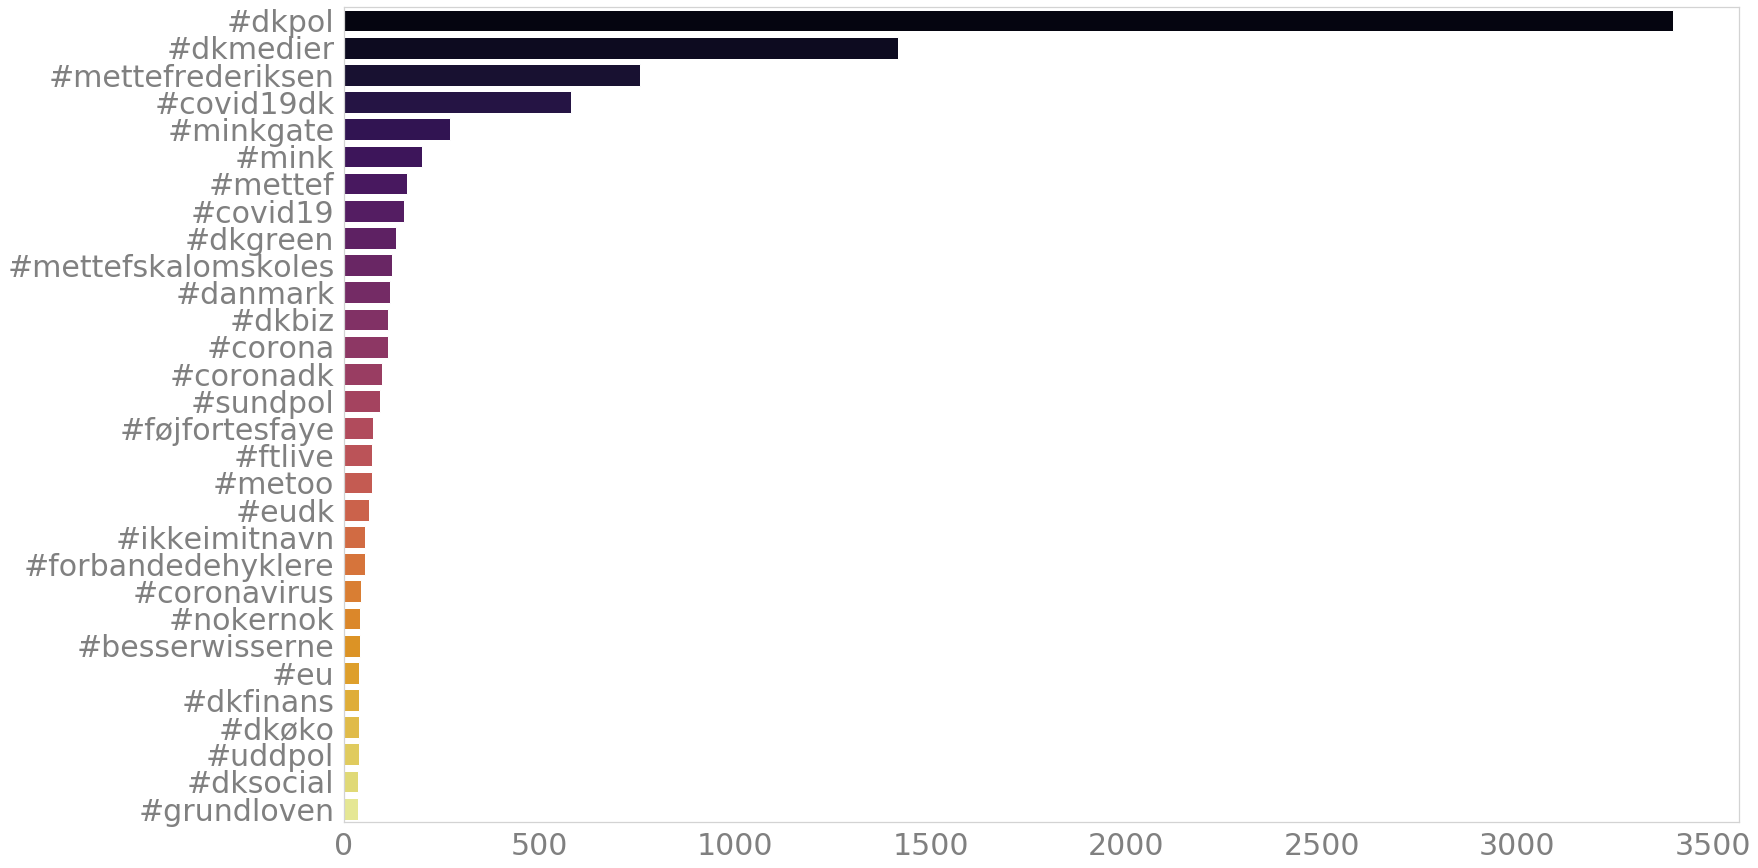

In [181]:
fig, ax1, palette = set_base_plot_settings(fontsize=30, if_palette = False)

palette = sns.color_palette("inferno", 30)

ax = sns.barplot(y="hashtag", x="nr_of_hashtags", 
                 palette = palette, 
                 data = dff)

fig, ax1 = set_late_barplot_settings()

plot_name = "fig/twitter_frequent_hashtags.png"
fig.savefig(plot_name)

## Sentiment analysis

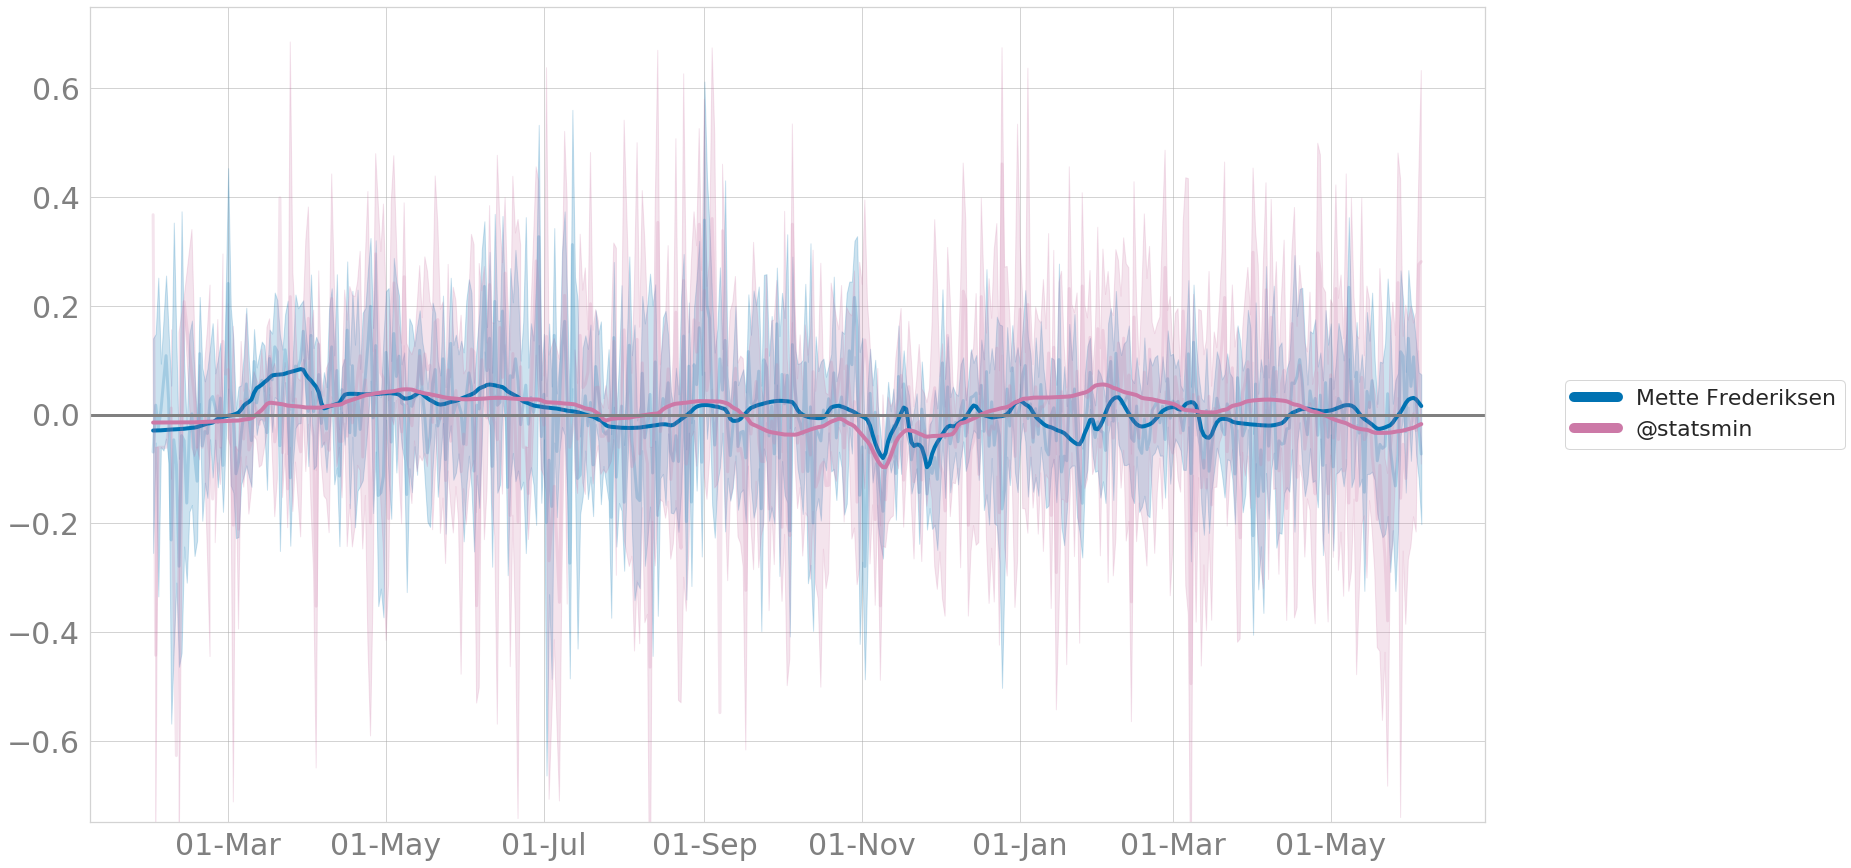

In [220]:
fig, ax1, palette = set_base_plot_settings(fontsize=30, if_palette = True)

ax1 = sns.lineplot(x="date", y="centered_compound", 
                   color = palette[5],
                   alpha = 0.2,
                     linewidth = 3, data = df)

ax1 = sns.lineplot(x="date", y="s500_compound", 
                   color = palette[5],
                   label = "Mette Frederiksen",
                     linewidth = 4, data = df)

ax1 = sns.lineplot(x="date", y="centered_compound", 
                   color = palette[7],
                   alpha = 0.2,
                     linewidth = 3, data = sdf)

ax1 = sns.lineplot(x="date", y="s500_compound", 
                   color = palette[7],
                   label = "@statsmin",
                     linewidth = 4, data = sdf)

fig, ax1 = set_late_plot_settings(if_dates = True)

ax1.set(ylim=(-.75, .75))
plt.axhline(0, color="grey", linewidth = 3)

leg = plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', facecolor='white')
# set the linewidth of each legend object
for legobj in leg.legendHandles:
    legobj.set_linewidth(10.0)

plot_name = "fig/twitter_sentiment_compound.png"
fig.savefig(plot_name, bbox_extra_artists=(leg,), bbox_inches='tight')

fig.show()

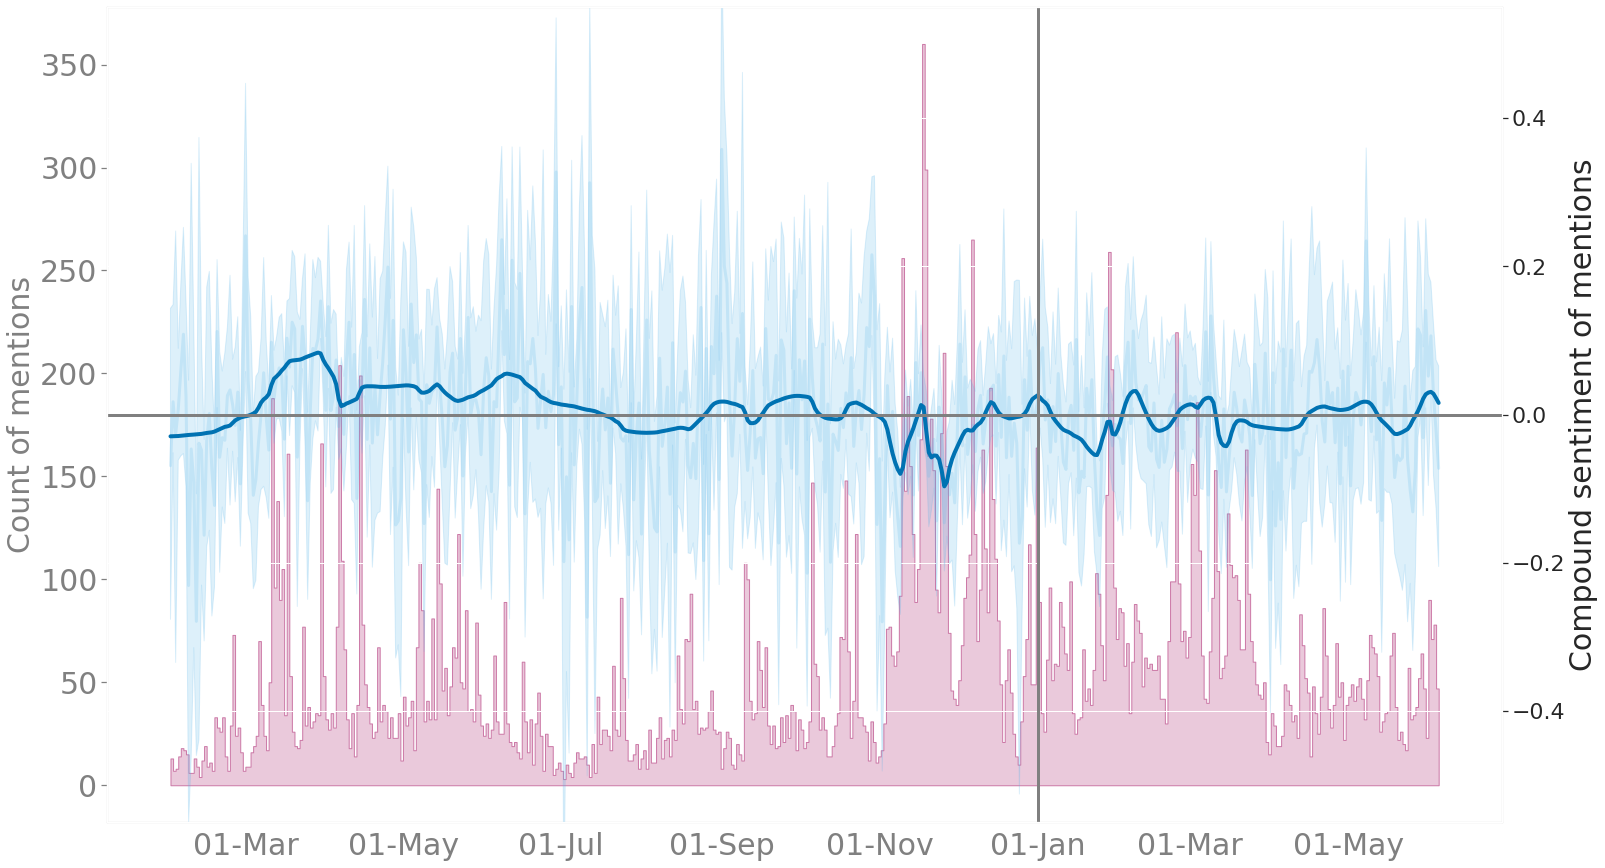

In [183]:
fig, ax0, palette = set_base_plot_settings(fontsize=30, if_palette = True)

yaxis = "s500_compound"

ax0 = sns.histplot(x="date", alpha = 0.4,
                   color = palette[7],
                   bins = len(df["date"].unique()), element="step",
                  data = df)

ax1 = ax0.twinx()

ax1 = sns.lineplot(x="date", y="centered_compound", 
                   color = palette[2],
                   alpha = 0.20,
                     linewidth = 3, data = df)

ax1 = sns.lineplot(x="date", y=yaxis, 
                   color = palette[5],
                     linewidth = 4, data = df)

plt.axvline(dt.datetime(2021, 1, 1), color="grey", linewidth = 3)
plt.axhline(0, color="grey", linewidth = 3)

ax1.set(xlabel="", ylabel = "Compound sentiment of mentions")
ax1.xaxis.get_label().set_fontsize(30)
ax1.yaxis.get_label().set_fontsize(30)
ax0.set(xlabel="", ylabel = "Count of mentions")
ax0.xaxis.get_label().set_fontsize(30)
ax0.yaxis.get_label().set_fontsize(30)

#ax1.grid(linestyle='-', linewidth=0.5, which= "both")

# Define the date format
ax1.xaxis_date()
date_form = mdates.DateFormatter("%d-%b")
ax1.xaxis.set_major_formatter(date_form)

ax1.set(ylim=(-0.55, 0.55))

plot_name = "fig/sentiment_compound_mentions_count.png"
fig.savefig(plot_name, bbox="tight", dpi=300)

fig.show()

## Word frequency

In [184]:
df["tokens_string"] = df["tokens_string"].astype(str)
texts = df["tokens_string"]

In [185]:
import string

texts = ", ".join(texts)
texts = texts.translate(str.maketrans('', '', string.punctuation))
texts = texts.lower()

In [190]:
word_freq = df.tokens_string.str.split(expand=True).stack().value_counts()

In [191]:
word_freq = word_freq.to_frame().reset_index().rename(columns={"index": "word", 0: "Frequency"}).sort_values("Frequency", ascending = False)

In [199]:
df0 = word_freq.drop([4,16], axis = 0).reset_index(drop=True)[0:30]

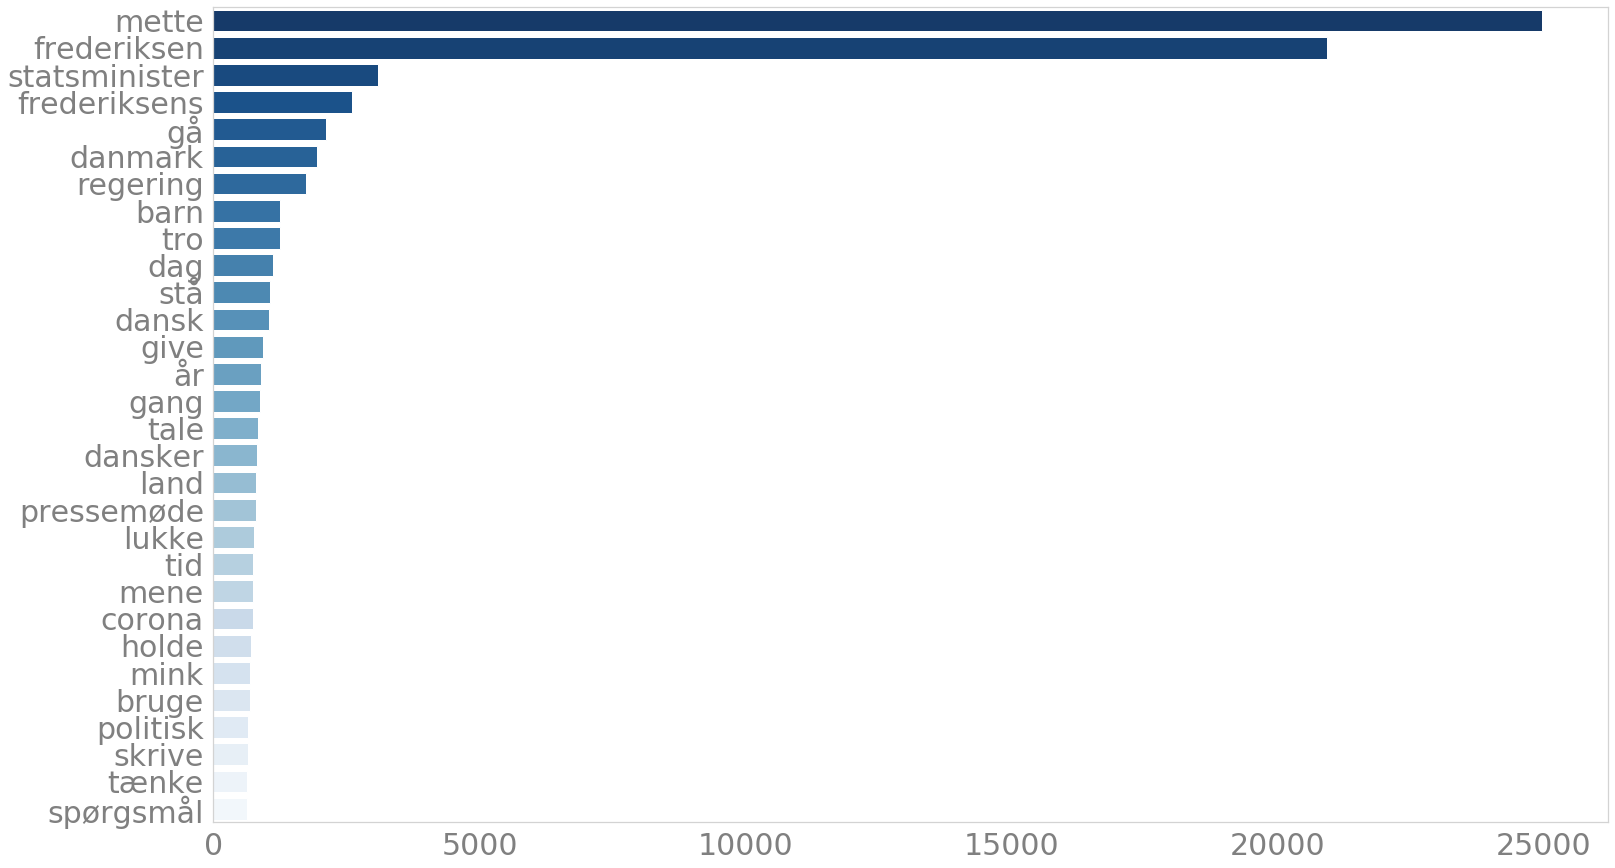

In [201]:
fig, ax1, palette = set_base_plot_settings(fontsize=30, if_palette = False)

nr_hash = len(df0["word"].unique())

palette = sns.color_palette("Blues_r", 30)

ax1 = sns.barplot(y="word", x="Frequency", palette = palette, data = df0)

fig, ax1 = set_late_barplot_settings()

plot_name = "fig/twitter_word_frequency.png"
fig.savefig(plot_name)

In [202]:
def tokens_per_row(data, row, name):
    # Let's take a subset of necessary columns, add id
    df = data[["date", row]].reset_index().rename(columns={"index": "id"})

    df = (df
     .set_index(['date','id'])[row]
     .apply(pd.Series)
     .stack()
     .reset_index()
     .drop('level_2', axis=1)
     .rename(columns={0:name}))

    return df

token_df = tokens_per_row(df, row="tokens_list", name = "token")
hashtag_df = tokens_per_row(df, row="hashtags", name = "hashtag")

In [203]:
per_date = token_df[['date', 'id', 'token']].groupby(['date', 'token']).agg(['count']).reset_index()
per_date["token_per_date"] = per_date["id"]["count"]
per_date = per_date[["date", "token", "token_per_date"]]
per_date_token = per_date.rename(columns={"token": "Token"})

In [204]:
per_date = hashtag_df[['date', 'id', 'hashtag']].groupby(['date', 'hashtag']).agg(['count']).reset_index()
per_date["hashtag_per_date"] = per_date["id"]["count"]
per_date = per_date[["date", "hashtag", "hashtag_per_date"]]
per_date_hash = per_date.rename(columns={"hashtag": "Hashtag"})

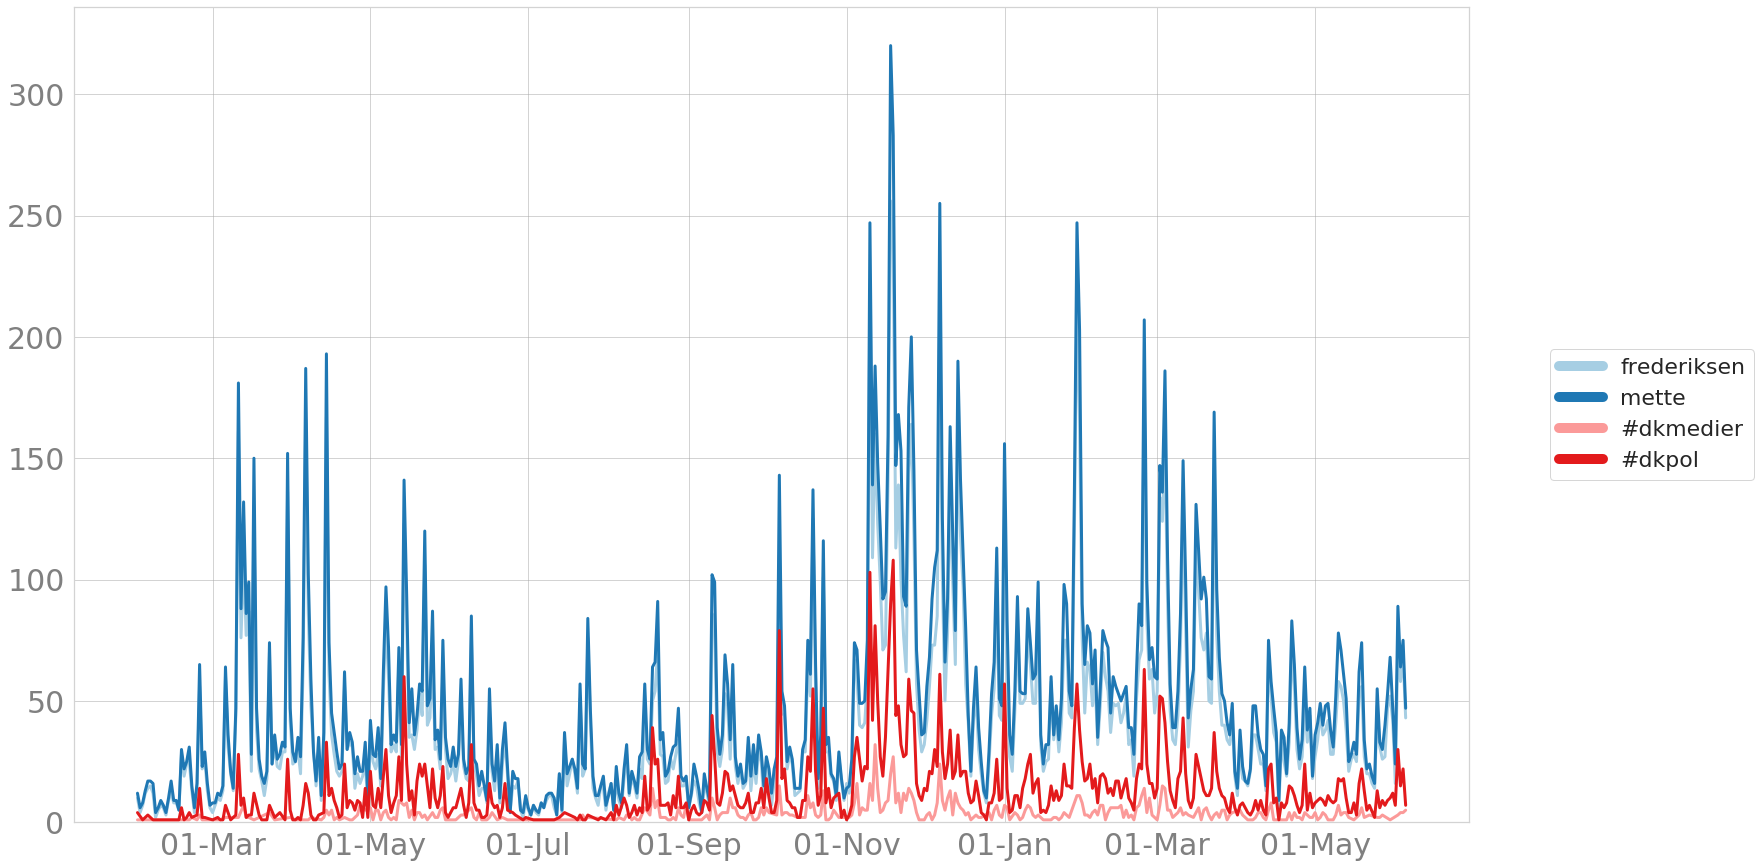

In [205]:
df_token = per_date_token.loc[per_date_token['Token'].isin(df0["word"][0:2])]
df_hash = per_date_hash.loc[per_date_hash['Hashtag'].isin(dff["hashtag"][0:2])]

fig, ax1, palette = set_base_plot_settings(fontsize=30, if_palette = False)

palette = sns.color_palette("Paired", 10)

ax1 = sns.lineplot(x="date", y="token_per_date", 
                  hue="Token", style="Token", 
                  markers = False, markersize = 10, 
                  dashes = False, 
                  palette = [palette[0], palette[1]], 
                  linewidth = 3, data = df_token)

ax1 = sns.lineplot(x="date", y="hashtag_per_date", 
                  hue="Hashtag", style="Hashtag", 
                  markers = False, markersize = 10, 
                  dashes = False, 
                  palette = [palette[4], palette[5]], 
                  linewidth = 3, data = df_hash)

fig, ax1 = set_late_plot_settings(if_dates = True)

leg = plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left', facecolor='white')
# set the linewidth of each legend object
for legobj in leg.legendHandles:
    legobj.set_linewidth(10.0)

plot_name = "fig/twitter_words_vs_hashtags_over_time.png"
fig.savefig(plot_name, bbox_extra_artists=(leg,), bbox_inches='tight')

fig.show()

## Word cloud

In [206]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline

def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
    plot_name = "fig/twitter_word_cloud.png"
    plt.savefig(plot_name)

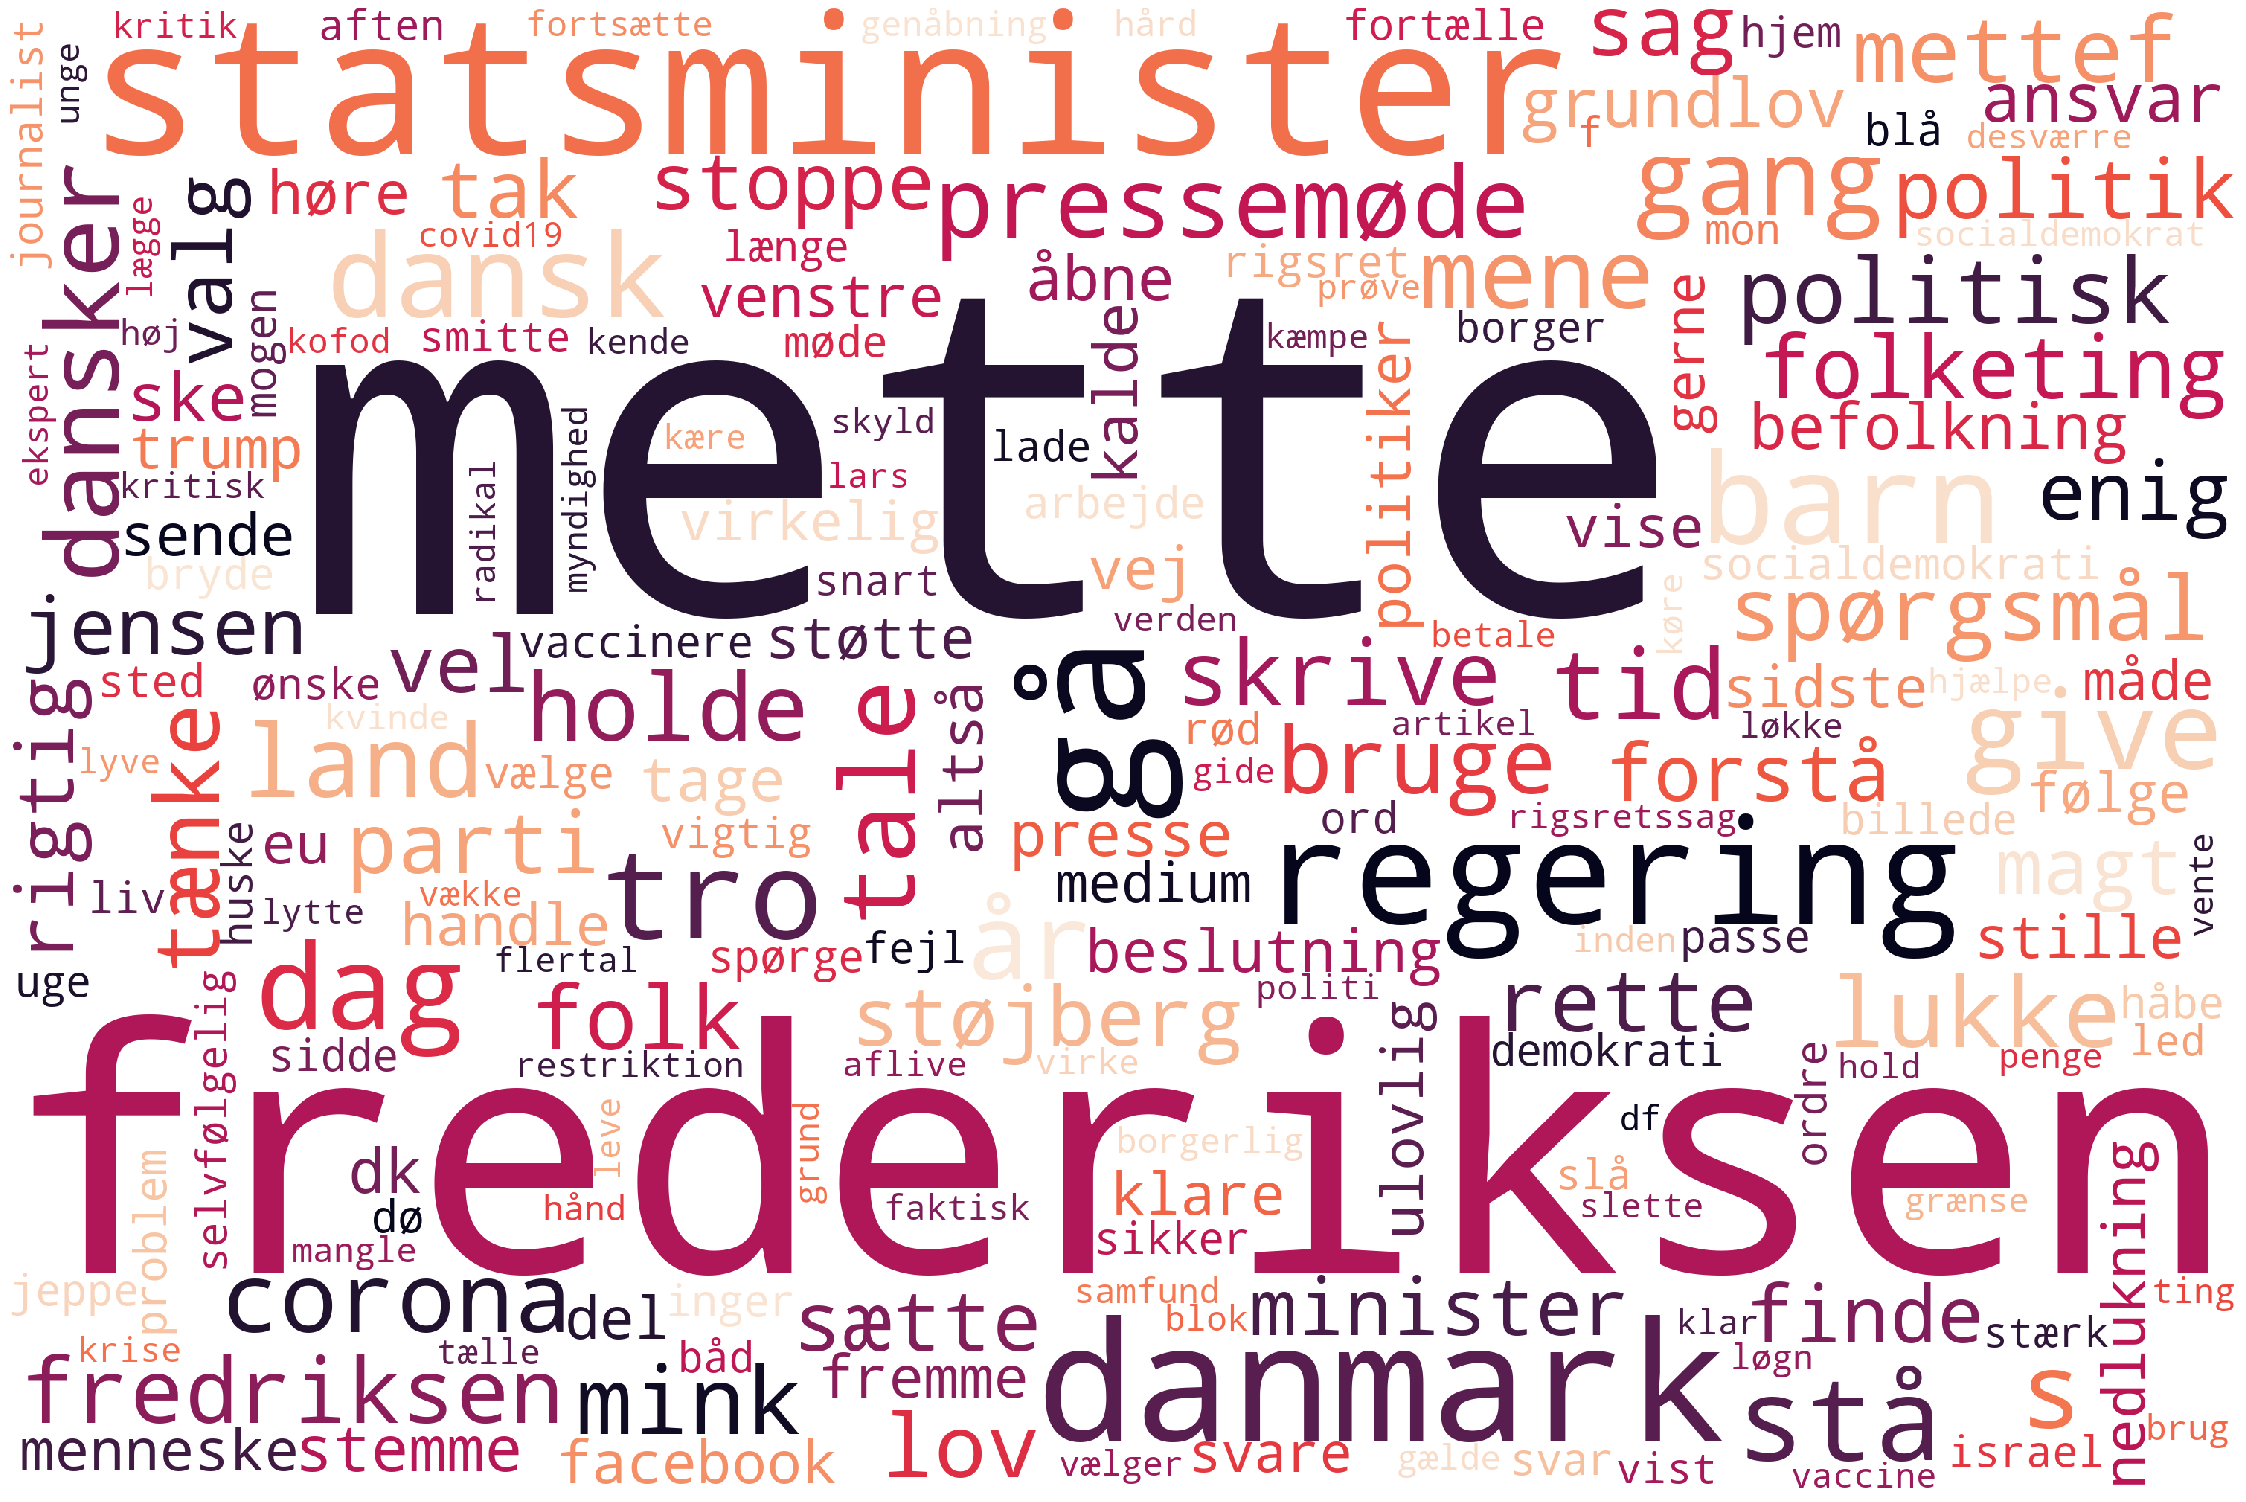

In [207]:
# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, 
                      background_color='white', colormap="rocket", 
                      collocations=False).generate(texts)
# Plot
plot_cloud(wordcloud)

## Co-occurrence

In [208]:
from nltk import bigrams
import itertools
import collections
import networkx as nx
import spacy
import nltk

In [209]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

#nlp = spacy.load("da_core_news_sm")

%matplotlib inline

In [210]:
# Create list of lists containing bigrams in tweets
#terms_bigram = list(bigrams(wordlist))
terms_bigram = [list(bigrams(tweet)) for tweet in df['tokens_list']]

# View bigrams for the first tweet
terms_bigram[0]

[('arh', 'egentlig'),
 ('egentlig', 'sjov'),
 ('sjov', 'grin'),
 ('grin', 'mette'),
 ('mette', 'frederiksen'),
 ('frederiksen', 'måde')]

In [211]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

In [212]:
bigram_df = pd.DataFrame(bigram_counts.most_common(30), columns=["bigram", "count"])

In [213]:
len(bigram_counts)

187069

In [214]:
bigram_df.head(30)

,bigram,count
0,"(mette, frederiksen)",20829
1,"(mette, frederiksens)",2579
2,"(statsminister, mette)",1402
3,"(mette, fredriksen)",618
4,"(frederiksen, gå)",300
5,"(frederiksen, s)",290
6,"(mogens, jensen)",267
7,"(inger, støjberg)",258
8,"(tro, mette)",222
9,"(frederiksen, statsminister)",200


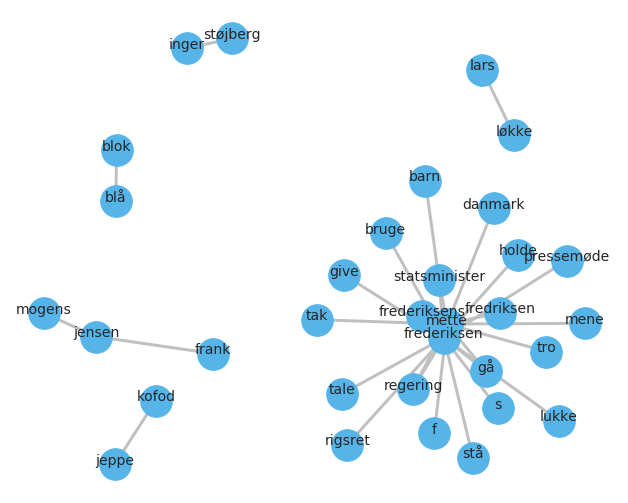

In [151]:
palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

# Create dictionary of bigrams and their counts
d = bigram_df.set_index("bigram").T.to_dict("records")
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 5))

fig, ax = plt.subplots(figsize=(11, 9))

pos = nx.spring_layout(G, k=5)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=3,
                 edge_color= "silver",
                 node_color= palette[2],
                 node_size = 1000,
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0], value[1]
    ax.text(x, y,
            s=key,
            #bbox=dict(facecolor= palette[2],
            #          alpha= 0.10),
            horizontalalignment='center', fontsize=14)
    

fig.patch.set_visible(False)
ax.axis('off')

plt.savefig("fig/twitter_bigram_graph.png", dpi=150, bbox_inches='tight')

plt.show()